**<font color='red'>Change the name from assignment_lastname to include YOUR last name</font>**. This will make sure that the assignment doesn't get overwritten when you do a git pull in class. 

# Homework 5B - the coding portion

## Due: Monday, April 19th

Skills: Plotting, reading in data files

Turn in instructions:
1. Before turning in your notebook, make sure you save it first using the floppy disk save icon or File -> save.
2. To turn in your assignment, you need to “git push” your assignment to your github using the following commands. You’ll need to be inside the PreMAPOG directory for this to work. (Not in your home directory.)
3. Email me to let me know you've finished with a link to your github repository.
```
git add *
git commit -m “<Include a message inside quotes: i.e. Finished HW 5B>”
git push
```

Always start with your import statement!

In [1]:
import numpy as np
from astropy.io import ascii #You need this to read in the data file from the paper
import matplotlib.pyplot as plt #You need this to be able to plot!

#This line is key if you want your plots to show up in the Jupyter notebook!
%matplotlib inline

### For your last coding homework, you will be reading in a data file from this [paper](https://arxiv.org/pdf/1707.01097.pdf) of homework 6 and working to recreate some of the plots in Figure 1. Please refer back to the notebook we worked on in class with plotting examples!

Read in the data file that was used to create the plots in Figure 1:

In [35]:
data = ascii.read('data/terrazas.txt',format='tab')

To check out what your data file looks like, you can execute the cell below to see the first three lines. Play around the try to display the first ten lines, lines 20-30, and the last three lines (*Hint: to display the last line, you would type data[:-1]* )

In [7]:
print(data[87:90])

  Name    M_*    SFR   M_BH MBH Error Method
-------- ------ ------ ---- --------- ------
NGC 4742 10.226 -1.175  7.1      0.15   star
NGC 5495 11.392  0.963 7.08       0.3  maser
NGC 7332 10.656 -1.279 7.08      0.18   star


To work with individual columns from a data table, you can call them by their names. Execute the cell below to check out only the `'Name'` column from the data table.

In [8]:
data['Name']

Centaurus A
Circinus
IC 1459
IC 4296
M31
M66
M81
M87
NGC 0307
NGC 0524
NGC 0821


**1)** Display only the **last** 10 lines of the `'M_BH'` column.

In [15]:
data['M_BH'][80:]

7.02
6.94
8.14
8.98
8.76
9.77
6.51
7.1
7.08
7.08


**2)** In the cell below, complete the `ax.scatter` command to make a scatter plot of the stellar mass `'M_*'` and the star formation rate `'SFR'`.

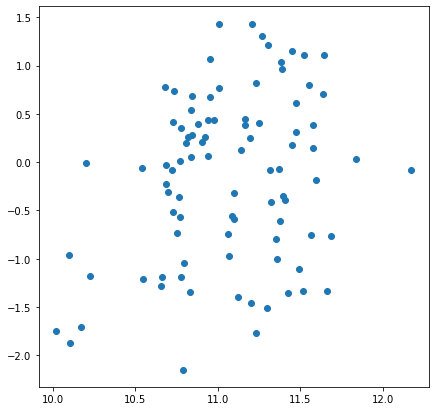

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data['M_*'],data['SFR'])

**3)** Copy your code to create the scatter plot from the previous question and add X and Y axis labels. Increase the font size of your axis labels to size 18.

Text(0, 0.5, 'Star Formation Rate')

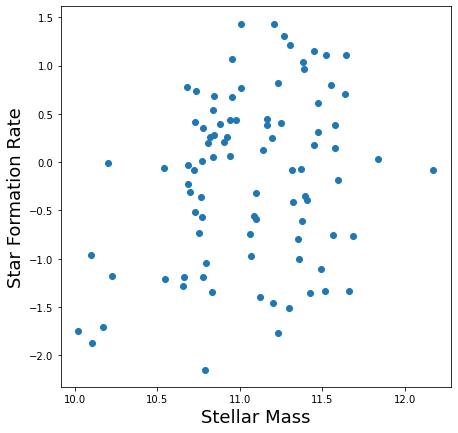

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(data['M_*'],data['SFR'])
plt.xlabel('Stellar Mass',fontsize=18)
plt.ylabel('Star Formation Rate',fontsize=18)


**4)** You can also make scatter plots with the `plot` command. Figure out how to make a scatter plot that looks like the one you made with `scatter` using the `plot` command. I suggest checking out this [plot gallery](https://matplotlib.org/2.1.1/gallery/index.html) from the `matplotlib` creators. If you click a plot, you will see code that shows how the plot was made. There is a nice scatter plot on the top row that was made with the `plot` command. There are a ton of these plot galleries online and it is a great way to figure out how to make a new plot!

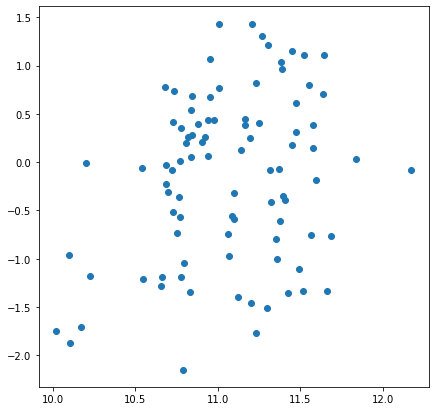

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(data['M_*'],data['SFR'],'o') 
#Hint: you'll need one more item inside the function call to get points instead of lines. 
#Check out the last item in the function call in the example in the plot gallery linked above

### Adding colors and labels

It can be helpful to color code certain points on a plot to understand where certain types of objects lie on your diagram. You can create masks to select certain types of points. For example, if I wanted to select all of the galaxies in `data` that have black holes measured with the method `star`, I would type:<br>

In [20]:
star = data['Method'] == 'star'

`star` is a mask: an array of `True` and `False` that is the same length as the full `data` array. The value of `star` is `True` where the `Method` column value is `star` and `False` where it is not. You can select rows from the array where `star` is `True` using the following command:

In [23]:
data[star][:5]

Name,M_*,SFR,M_BH,MBH Error,Method
str11,float64,float64,float64,float64,str9
Centaurus A,10.904,0.213,7.755,0.084,star
IC 1459,11.381,-0.611,9.394,0.079,star
M31,10.731,-0.519,8.155,0.161,star
M66,10.84,0.536,6.929,0.048,star
M87,11.519,-1.335,9.789,0.031,star


If you just want to plot out the values in the `SFR` column for the galaxies with `Method = star`, you could type:

In [26]:
data['SFR'][star]

0.213
-0.611
-0.519
0.536
-1.335
-0.567
-0.559
-1.189
-0.73
-0.187
-0.739


To find out the total unique values in an array, you can use the `np.unique` function. Execute the cell below to see the unique values in the `Method` column:

In [27]:
np.unique(data['Method'])

CO
RM
gas
maser
star
"star, gas"


**5)** Create a scatter plot with the stellar mass on the X-axis and the black hole mass on the Y-axis (using either the `scatter` or `plot` command, whichever you prefer) where the points are color coded by their measurement method. Make sure to add a label for each set of points and include a legend on your plot. *Make sure to label your axes!*

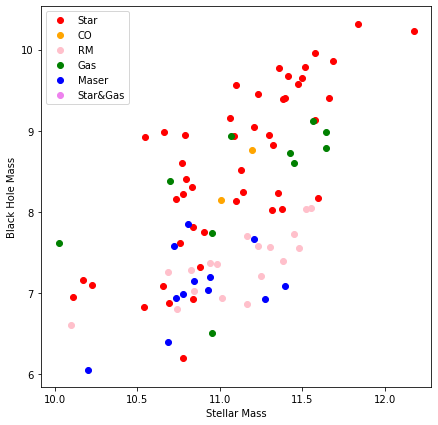

In [34]:
fig,ax=plt.subplots(figsize=(7,7))

star = (data['Method']=='star')
CO = (data['Method'] == 'CO')
RM = (data['Method'] == 'RM')
gas = (data['Method'] == 'gas')
maser = (data['Method'] == 'maser')
star_gas = (data['Method'] == 'star,gas')

#Plot each type of point below:

plt.plot(data['M_*'][star],data['M_BH'][star],'o',color='red',label='Star')
plt.plot(data['M_*'][CO],data['M_BH'][CO],'o',color='orange',label='CO')
plt.plot(data['M_*'][RM],data['M_BH'][RM],'o',color='pink',label='RM')
plt.plot(data['M_*'][gas],data['M_BH'][gas],'o',color='green',label='Gas')
plt.plot(data['M_*'][maser],data['M_BH'][maser],'o',color='blue',label='Maser')
plt.plot(data['M_*'][star_gas],data['M_BH'][star_gas],'o',color='violet',label='Star&Gas')

#Don't forget to include axis labels

plt.xlabel('Stellar Mass')
plt.ylabel('Black Hole Mass')

#Include the command to display the legend
plt.legend()

**Challenge**:<br>
<br>
Create a scatter plot that looks like the first plot in Figure 1 from the paper. Plot SFR/$M_{*}$ on the Y-axis and $M_{*}$ on the X-axis and color code the points by their value of $M_{BH}$. Include a color bar. Don't worry about error bars or the gray points or background line.<br>
*Hint: check out the example on [this stack overflow page](https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter)*<br>
*Another hint, when using a colormap, you need to set `vmin` and `vmax` values. A good way to set these is for `vmin` to by the minimum value of the array you're using to color code and `vmax` is the maximum value of that array. You can find the minimum value of an array with `numpy` using the `np.amin(array)` function and find the max with the `np.amax` function.*<br>
*Ok, last hint: if you really want your color map to look like the one in the paper, check out [this page](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) from `matplotlib` that shows what all their color maps look like and choose one that looks like the one in the paper. I'm sure this plot was made with python so you should be able to find the exact same one!*

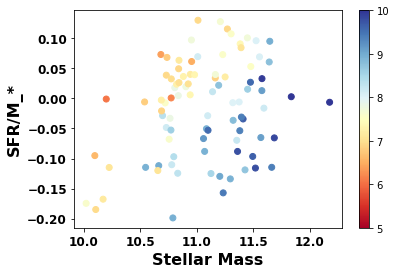

In [59]:
cm = plt.cm.get_cmap('RdYlBu')

z=data['M_BH']

sc = plt.scatter(data['M_*'],data['SFR']/data['M_*'],vmin=5,vmax=10,c=z,cmap=cm)

plt.xlabel('Stellar Mass',fontsize=16,fontweight='bold')
plt.ylabel('SFR/M_*',fontsize=16,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

plt.colorbar(sc)
